<a href="https://colab.research.google.com/github/JaiRamteke/PageRank_Among_Class_Students/blob/main/PageRank_Among_Class_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-562ad2ba11ef>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student = row[0]  # Assuming the first column is the student's name


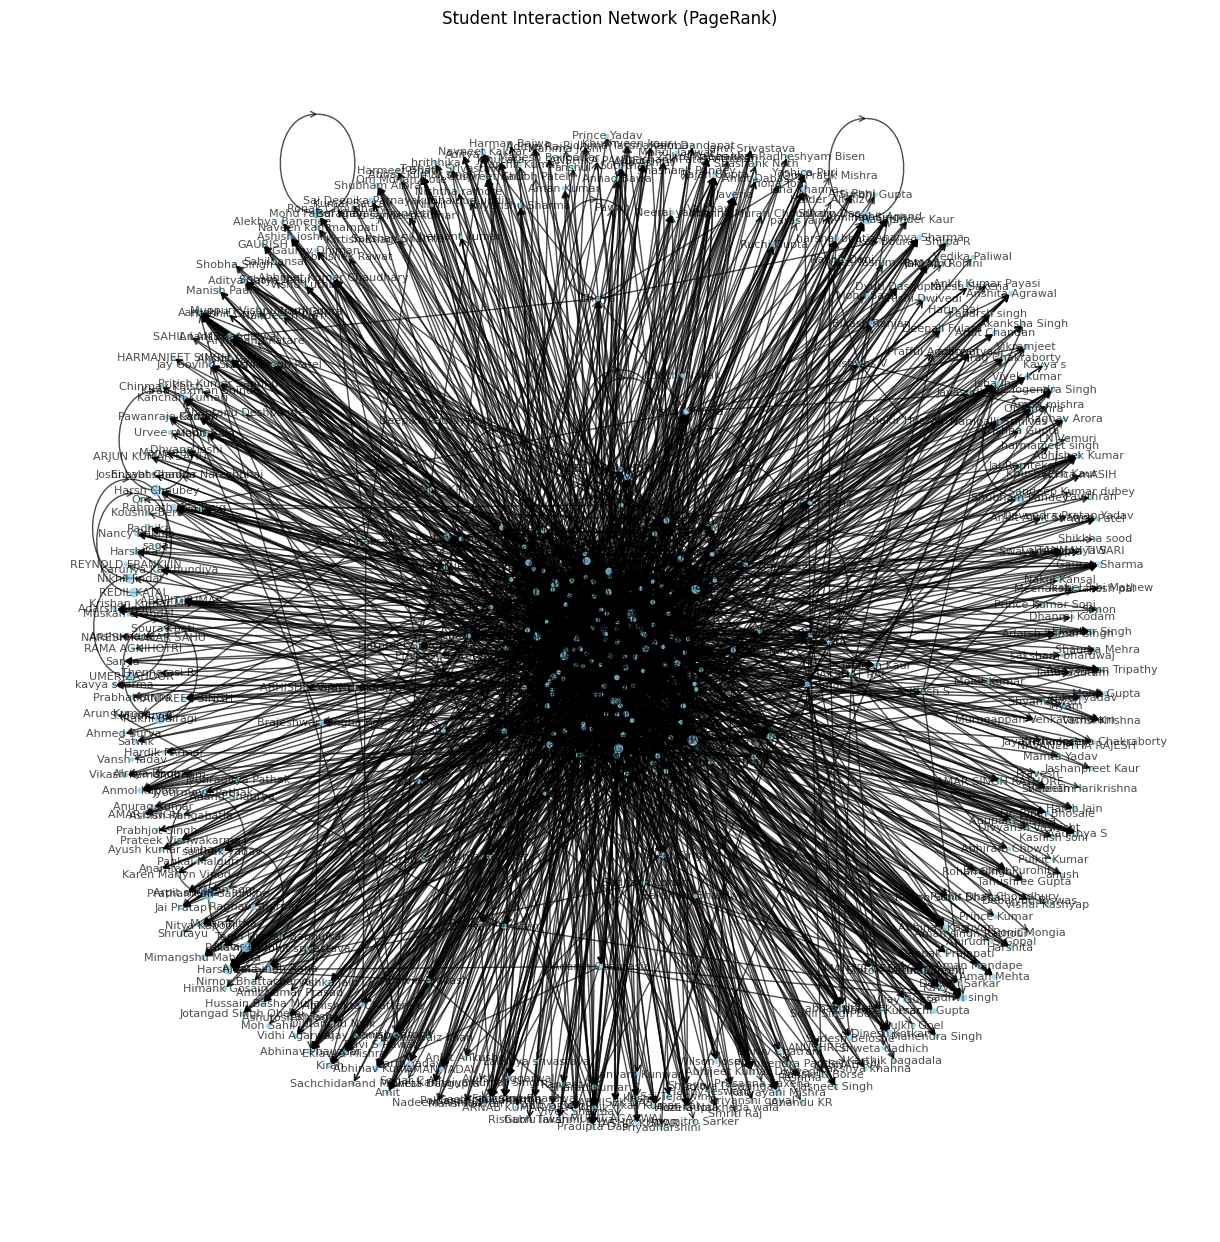

In [1]:
# Read csv impression_network.csv. This csv contains the name of students in the first column and the name of students they liked interacting with in the following columns. Based on this data form a page rank graph of all students an display it

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Install necessary libraries if not already installed
!pip install pandas networkx matplotlib

# Load the CSV file into a pandas DataFrame
try:
  df = pd.read_csv('impression_network.csv')
except FileNotFoundError:
  print("Error: 'impression_network.csv' not found. Please upload the file to your Colab environment.")
  exit()

# Create a directed graph
graph = nx.DiGraph()

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
  student = row[0]  # Assuming the first column is the student's name
  graph.add_node(student)
  for col in df.columns[1:]: # Iterate over columns of interactions
      if pd.notna(row[col]):
          liked_student = row[col]
          if liked_student not in graph:
              graph.add_node(liked_student)
          graph.add_edge(student, liked_student)

# Calculate PageRank
pagerank = nx.pagerank(graph)

# Draw the graph with node size proportional to PageRank
node_sizes = [pagerank[node] * 5000 for node in graph.nodes]  # Adjust scaling for visibility

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph) # Use spring layout for better visualization
nx.draw(graph, pos, with_labels=True, node_size=node_sizes, node_color="skyblue", font_size=8, alpha=0.7, arrows=True, arrowstyle='->', arrowsize=10)
plt.title("Student Interaction Network (PageRank)")
plt.show()

<ipython-input-2-a9f8e6f68130>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student = row[0]  # Assuming the first column is the student's name


Top 5 Students by PageRank:
Purba Bandyopadhyay: 0.009541271372637203
Harsh Zala: 0.00788817323525377
Jinal Gupta: 0.007563291538649691
Anurag Bhattacharya: 0.007213229231592227
Ruhani Sharma: 0.006538471667730573


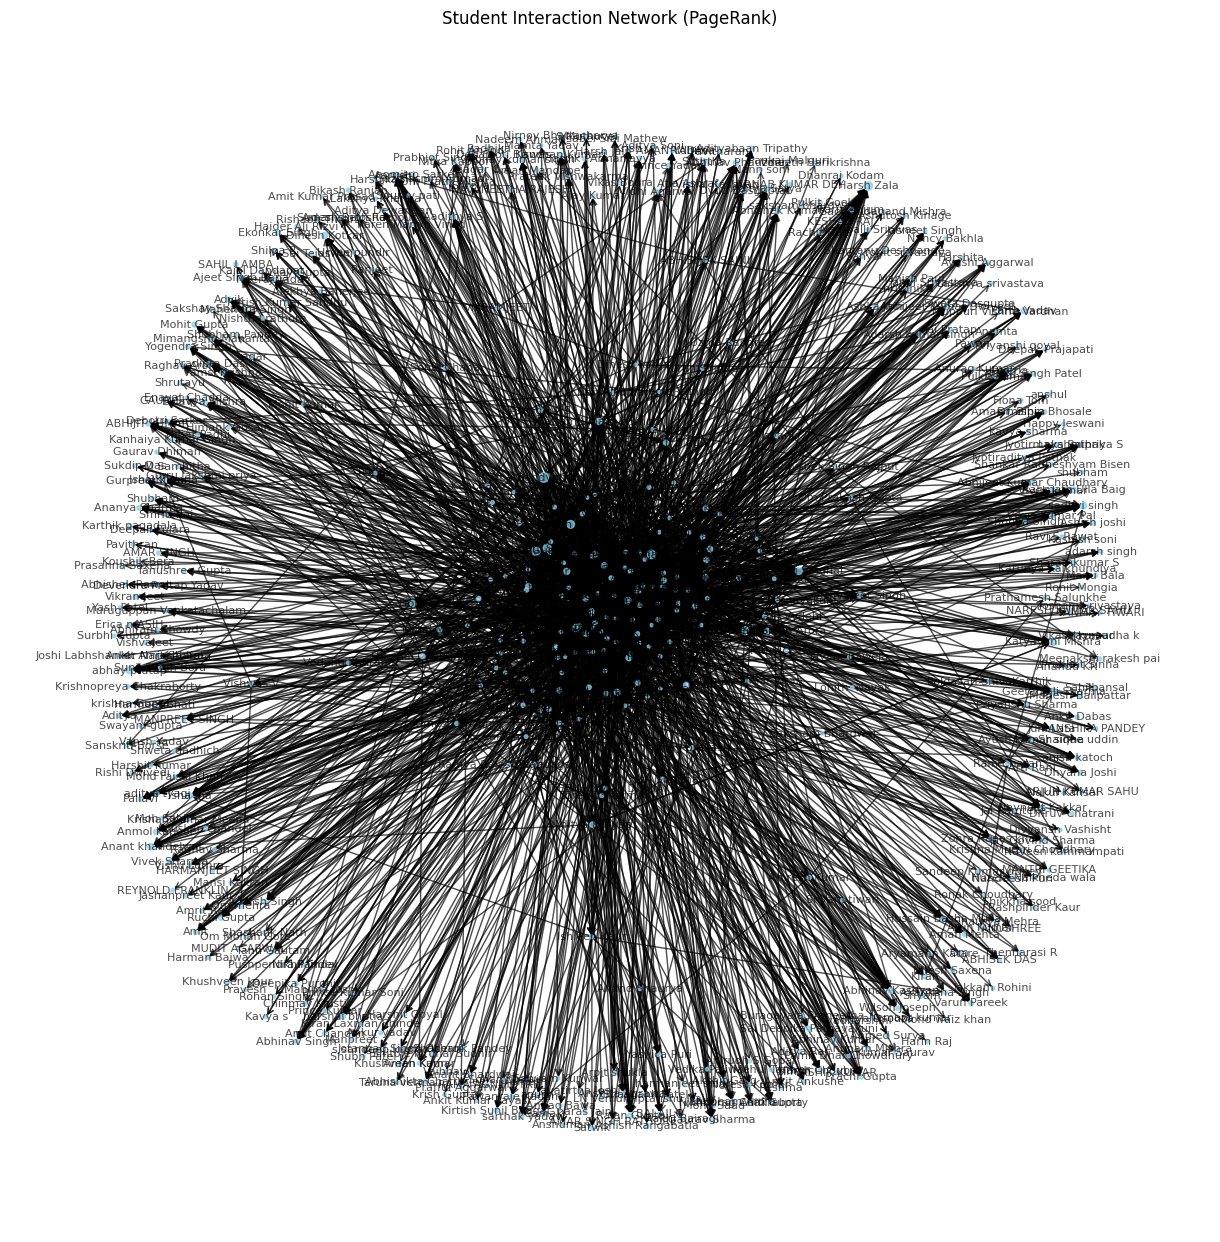

In [2]:
# In the above data make sure there are no duplicate names in the graph and  then give me the name of top 5 students using page rank algorithm, make sure that you arrange the rank of students in decreasing order

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Install necessary libraries if not already installed
!pip install pandas networkx matplotlib

# Load the CSV file into a pandas DataFrame
try:
  df = pd.read_csv('impression_network.csv')
except FileNotFoundError:
  print("Error: 'impression_network.csv' not found. Please upload the file to your Colab environment.")
  exit()

# Create a directed graph
graph = nx.DiGraph()

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
  student = row[0]  # Assuming the first column is the student's name
  graph.add_node(student)
  for col in df.columns[1:]: # Iterate over columns of interactions
      if pd.notna(row[col]):
          liked_student = row[col]
          if liked_student not in graph:
              graph.add_node(liked_student)
          graph.add_edge(student, liked_student)

# Remove duplicate names (nodes) while preserving edges
# Create a new graph to avoid modifying the original one during iteration
unique_graph = nx.DiGraph()
for u, v in graph.edges:
    if u != v: # Exclude self-loops
      unique_graph.add_edge(u, v)

# Calculate PageRank
pagerank = nx.pagerank(unique_graph)

# Sort students by PageRank and get the top 5
sorted_pagerank = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
top_5_students = sorted_pagerank[:5]

# Print the top 5 students and their PageRank scores
print("Top 5 Students by PageRank:")
for student, score in top_5_students:
    print(f"{student}: {score}")

# Draw the graph with node size proportional to PageRank
node_sizes = [pagerank[node] * 5000 for node in unique_graph.nodes]  # Adjust scaling for visibility

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(unique_graph) # Use spring layout for better visualization
nx.draw(unique_graph, pos, with_labels=True, node_size=node_sizes, node_color="skyblue", font_size=8, alpha=0.7, arrows=True, arrowstyle='->', arrowsize=10)
plt.title("Student Interaction Network (PageRank)")
plt.show()

In [3]:
# now from the above data graph find the top 5 students using page rank algorithm, make sure that you arrange the rank of students in decreasing order

# Assuming 'df' and 'unique_graph' are already defined from the previous code

# Calculate PageRank
pagerank = nx.pagerank(unique_graph)

# Sort students by PageRank and get the top 5
sorted_pagerank = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
top_5_students = sorted_pagerank[:5]

# Print the top 5 students and their PageRank scores
print("Top 5 Students by PageRank:")
for student, score in top_5_students:
    print(f"{student}: {score}")

Top 5 Students by PageRank:
Purba Bandyopadhyay: 0.009541271372637203
Harsh Zala: 0.00788817323525377
Jinal Gupta: 0.007563291538649691
Anurag Bhattacharya: 0.007213229231592227
Ruhani Sharma: 0.006538471667730573


In [17]:
# Identify the students who have mutual likes (both mentioned and were mentioned by the same person, Make sure the first and second person are not same and print the count of number of pairs

import pandas as pd
import networkx as nx

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('impression_network.csv')
except FileNotFoundError:
    print("Error: 'impression_network.csv' not found. Please upload the file to your Colab environment.")
    exit()

# Create a directed graph
graph = nx.DiGraph()

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    student = row.iloc[0]  # Assuming the first column is the student's name
    graph.add_node(student)
    for col in df.columns[1:]:  # Iterate over columns of interactions
        if pd.notna(row[col]):
            liked_student = row[col]
            if liked_student not in graph:
                graph.add_node(liked_student)
            graph.add_edge(student, liked_student)

mutual_likes_count = 0
mutual_likes_pairs = set() # Use a set to avoid duplicate pairs

for student1 in graph.nodes:
    for student2 in graph.nodes:
      if student1 != student2:
        if graph.has_edge(student1, student2) and graph.has_edge(student2, student1):
          pair = tuple(sorted((student1, student2))) # Sort to ensure consistent ordering
          if pair not in mutual_likes_pairs:  # Check for duplicates before adding
              mutual_likes_pairs.add(pair)
              mutual_likes_count += 1

print("Number of mutual like pairs:", mutual_likes_count)

# Print all the mutual like pairs
print("\nMutual Like Pairs:")
for pair in mutual_likes_pairs:
    print(pair)


Number of mutual like pairs: 94

Mutual Like Pairs:
('Abhinav Sameer Oraon', 'Anurag Bhattacharya')
('Latasha', 'Soundarya M')
('Saurabh Biswas', 'Utkarsh Dubey')
('Prakhar Gupta', 'Yathi Pachauri')
('Amogh A S', 'Satyarth Singh')
('Savitri Tangirala', 'vineet kumar')
('Meetali Agarwal', 'Saurabh Biswas')
('Ashlesh S', 'Jinal Gupta')
('Anshuman Garg', 'Balram Vinayak Singh')
('ROHIT ANAND', 'Rutvik')
('Harshal Chaudhari', 'Soham Ghosh')
('Anurag Bhattacharya', 'Vishal Shukla')
('Daksh Yadav', 'Savitri Tangirala')
('Abhinav Sameer Oraon', 'Sanjamdeep Singh')
('Kamaxi Patel', 'Tanuj Dhull')
('Anurag Bhattacharya', 'Ruhani Sharma')
('Amogh A S', 'Soham Ghosh')
('Mayank Raj', 'Swarnaa Lakshmi.S')
('KONARK BAJPAI', 'Purba Bandyopadhyay')
('Rudransh Garg', 'Tanuj Dhull')
('Meetali Agarwal', 'Prakhar Gupta')
('Aman Yadav', 'Prakhar Gupta')
('Binesh Balakrishnan', 'Harika Rani')
('Jaya Raut', 'Tarun Asthana')
('Savitri Tangirala', 'Soundarya M')
('Ifshan sajad', 'Mayank Raj')
('Saurabh Biswas'

In [7]:
# prompt: Identify the students who have mutual likes (both mentioned and were mentioned by the same person, Make sure the first and second person are not same and print the count of number of pairs

# Assuming 'df' and 'graph' are already defined from the previous code

mutual_likes_count = 0
mutual_likes_pairs = set()  # Use a set to avoid duplicate pairs

for student1 in graph.nodes:
    for student2 in graph.nodes:
        if student1 != student2:
            if graph.has_edge(student1, student2) and graph.has_edge(student2, student1):
                pair = tuple(sorted((student1, student2)))  # Sort to ensure consistent ordering
                if pair not in mutual_likes_pairs:  # Check for duplicates before adding
                    mutual_likes_pairs.add(pair)
                    mutual_likes_count += 1

print("Number of mutual like pairs:", mutual_likes_count)

Number of mutual like pairs: 94


In [8]:
# prompt: First convert this directed graph to undirected graph and remove duplicate names. Detect clusters of students who form tight-knit groups based on mutual interactions. Also print number of students in each cluster. "Switch to a more granular community detection algorithm, such as Leiden, which often produces better-defined clusters. Adjust resolution parameters to balance cluster sizes."


# Install necessary libraries if not already installed
!pip install leidenalg igraph

import pandas as pd
import networkx as nx
import igraph as ig
import leidenalg as la

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('impression_network.csv')
except FileNotFoundError:
    print("Error: 'impression_network.csv' not found. Please upload the file to your environment.")
    exit()

# Create an undirected graph in NetworkX
graph = nx.Graph()

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    student = row[0]  # Assuming the first column is the student's name
    graph.add_node(student)
    for col in df.columns[1:]:  # Iterate over columns of interactions
        if pd.notna(row[col]):
            liked_student = row[col]
            if liked_student not in graph:
                graph.add_node(liked_student)
            graph.add_edge(student, liked_student)

# Remove duplicate names (nodes) while preserving edges
unique_graph = nx.Graph()
for u, v in graph.edges:
    if u != v:  # Exclude self-loops
        unique_graph.add_edge(u, v)

# Convert the NetworkX graph to an iGraph graph
igraph_graph = ig.Graph.from_networkx(unique_graph)

# Assign node names to the iGraph vertices
igraph_graph.vs["name"] = list(unique_graph.nodes)

# Use Leiden algorithm for community detection
partition = la.find_partition(igraph_graph, la.ModularityVertexPartition)

# Print the number of students in each cluster and their members
for i, cluster in enumerate(partition):
    print(f"Cluster {i+1}: {len(cluster)} students")
    print("Members:", [igraph_graph.vs[node]["name"] for node in cluster])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.2 MB/s eta 0:00:00


<ipython-input-8-4787c6ef6b24>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student = row[0]  # Assuming the first column is the student's name


Cluster 1: 91 students
Members: ['Suman Tumula', 'Yogendra Singh', 'Jinal Gupta', 'Eklavya Mishra', 'Abhinav Kashyap', 'Abhijeet Kumar Chaudhary', 'Abhinav Kumar', 'Abhinav Phauzdar', 'sadhvi singh', 'Abhijeet Kumar Dwivedi', 'Anshita Agrawal', 'Diptanshu Naik', 'Nampalli Srinivas', 'Abhay kumar singh', 'MUDIT AGARWAL', 'manu chopra', 'Abhinav Singh', 'Venkata Naga Sai Krishna Kolapalli', 'vivek kumar', 'Swarnaa Lakshmi.S', 'Abhijit Kumar', 'Komal Kushwaha', 'Ifshan sajad', 'Aman Singh Rathour', 'Arpan Nandi', 'mrunal shitole', 'Taruna Verma', 'Pradipta Das', 'Mayank Raj', 'Adarsh Singh', 'Rishi Dwivedi', 'Ashutosh Kinage', 'Debotri Sarkar', 'Ashlesh S', 'Adarsh Chaurasia', 'Adarsh kumar singh', 'abhay pratap', 'Mimangshu Mahanta', 'RITESH KUMAR DINDAY', 'Navya Mehta', 'Sadhana Lohar', 'Shashwat Tiwari', 'Yash Asodariya', 'Shah Sneh Kinchitkumar', 'Anubhav', 'Arshdeep Dubey', 'Riya Kumari', 'Shivam Sharma', 'Arjun Chakraborty', 'Bibaswan Kundu', 'Aditya R', 'Naitik kumar', 'Kanchan ran

In [9]:
# prompt:find the number and name of students that act as a bridge between the 10 clusters we foound earlier

# Assuming 'df' and 'graph' are already defined from the previous code
import networkx as nx

# Find connected components (clusters)
clusters = list(nx.connected_components(graph))

# Identify students bridging clusters
bridging_students = set()
for i in range(len(clusters)):
    for j in range(i + 1, len(clusters)):
        # Iterate through all students in clusters i and j to find common neighbors
        for student_i in clusters[i]:
            for student_j in clusters[j]:
                if graph.has_edge(student_i, student_j):
                    bridging_students.add(student_i)
                    bridging_students.add(student_j)

# Print each bridging student's name and the total count
print("Students bridging different clusters:")
for student in bridging_students:
    print(student)

print("\nTotal count of students bridging clusters:", len(bridging_students))

Students bridging different clusters:

Total count of students bridging clusters: 0


In [10]:
# prompt: Check if students who are highly liked (the top 5 students we got earlier) also interact with many others consistently.

# Assuming 'top_5_students' and 'graph' are already defined from the previous code

# Calculate degree centrality for all students
degree_centrality = nx.degree_centrality(graph)

# Print degree centrality for the top 5 students
print("\nDegree Centrality of Top 5 Students:")
for student, score in top_5_students:
    try:
        print(f"{student}: {degree_centrality[student]}")
    except KeyError:
        print(f"{student}: Not found in the interaction network.")

# Further analysis: Check if high PageRank students also have high degree centrality.
# You can set a threshold for degree centrality and see how many of the top 5 students
# exceed that threshold.  This helps to determine if highly liked students also interact
# with many others.


Degree Centrality of Top 5 Students:
Purba Bandyopadhyay: 0.07564575645756458
Harsh Zala: 0.07380073800738007
Jinal Gupta: 0.11254612546125461
Anurag Bhattacharya: 0.04428044280442804
Ruhani Sharma: 0.04981549815498155


In [11]:
# prompt: from the above data graph find the top 10 students using page rank algorithm, make sure that you arrange the rank of students in decreasing order

# Assuming 'pagerank' and 'unique_graph' are already defined from the previous code

# Sort students by PageRank and get the top 10
sorted_pagerank = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
top_10_students = sorted_pagerank[:10]

# Print the top 10 students and their PageRank scores
print("Top 10 Students by PageRank:")
for student, score in top_10_students:
    print(f"{student}: {score}")

Top 10 Students by PageRank:
Purba Bandyopadhyay: 0.009541271372637203
Harsh Zala: 0.00788817323525377
Jinal Gupta: 0.007563291538649691
Anurag Bhattacharya: 0.007213229231592227
Ruhani Sharma: 0.006538471667730573
Utkarsh Dubey: 0.006246596895907621
Komal Kushwaha: 0.005745629924147339
abhay pratap: 0.005046350131184152
Nandini Singhal: 0.005032368729986202
sadhvi singh: 0.004582478389248011


In [13]:
# prompt: Rerun the page rank algorithm after removing the top 5 students. and give the next top 10 students. make sure that you arrange the rank of students in decreasing order

# Remove the top 5 students from the graph
students_to_remove = [student for student, _ in top_5_students]
new_graph = unique_graph.copy()
new_graph.remove_nodes_from(students_to_remove)

# Recalculate PageRank for the new graph
new_pagerank = nx.pagerank(new_graph)

# Sort students by new PageRank and get the next top 10
sorted_new_pagerank = sorted(new_pagerank.items(), key=lambda item: item[1], reverse=True)
next_top_10_students = sorted_new_pagerank[:10]

# Print the next top 10 students and their PageRank scores
print("\nNext Top 10 Students by PageRank (after removing top 5):")
for student, score in next_top_10_students:
    print(f"{student}: {score}")


Next Top 10 Students by PageRank (after removing top 5):
Mayank Raj: 0.009863555204139864
Abhijit Kumar: 0.009847929626788432
Yogesh Jagtap: 0.008728510598473418
Harshit Gupta: 0.007624230936584661
Aman Yadav: 0.0076105906574923795
Deepak Kumar: 0.007597709080731477
Mounasri Mondal: 0.007521812968852803
Ashish Moitra: 0.0071962418114799595
Ravi Shankar Rawat: 0.0071735282289119955
Anshuman Garg: 0.007018932764808656


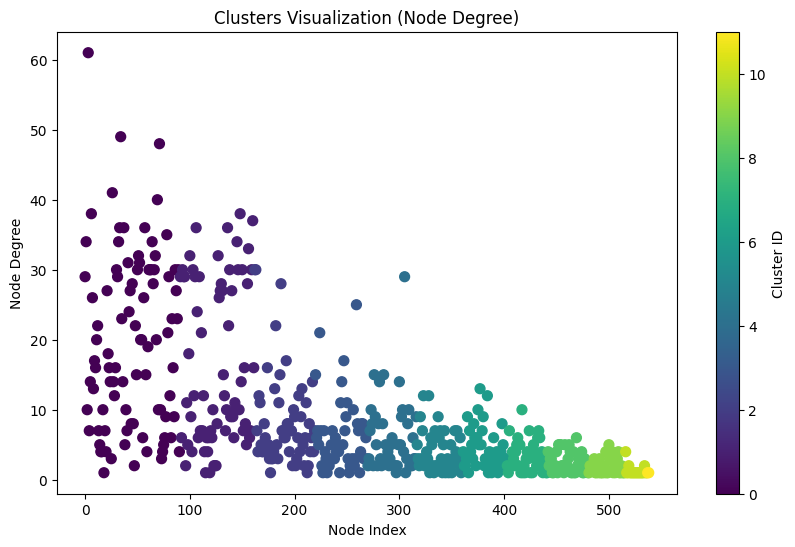

In [14]:
# prompt: in the above code also plot a scatter plot for the clusters that are found

# ... (Your existing code) ...

# Assuming 'igraph_graph' and 'partition' are already defined from the previous code

# Prepare data for the scatter plot
cluster_labels = [i for i, cluster in enumerate(partition) for _ in cluster]
x_coords = [i for i in range(len(igraph_graph.vs))]  # Dummy x-coordinates
y_coords = [igraph_graph.degree()[i] for i in range(len(igraph_graph.vs))] # degree as y

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Node Index')
plt.ylabel('Node Degree')
plt.title('Clusters Visualization (Node Degree)')
plt.colorbar(label='Cluster ID')

# Annotate some points with node names (optional - might be crowded)
#for i, node_name in enumerate(igraph_graph.vs["name"]):
#    plt.annotate(node_name, (x_coords[i], y_coords[i]), fontsize=6, alpha=0.7)

plt.show()